In [4]:
!pip install missingno

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from missingno import matrix
import missingno as msno

In [7]:
df = pd.read_csv(r'C:\Users\nuria\Proyecto_EDA\data\raw\Student Depression Dataset.csv')

In [8]:
df.set_index('id')

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,
2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0


1 Análisis Detallado de Valores Faltantes
1. Patrones de Missing Data:
   * MCAR (Missing Completely at Random)
     - Test de Little para MCAR
     - Análisis de aleatoriedad en los patrones
     - Comparación de distribuciones entre datos faltantes y no faltantes

   * MAR (Missing at Random)
     - Análisis de correlación entre missingness y otras variables
     - Patrones de missingness condicional
     - Visualización de patrones de missingness

   * MNAR (Missing Not at Random)
     - Identificación de sesgos sistemáticos
     - Análisis de causas de no respuesta
     - Evaluación del impacto en el análisis

<Figure size 1000x600 with 0 Axes>

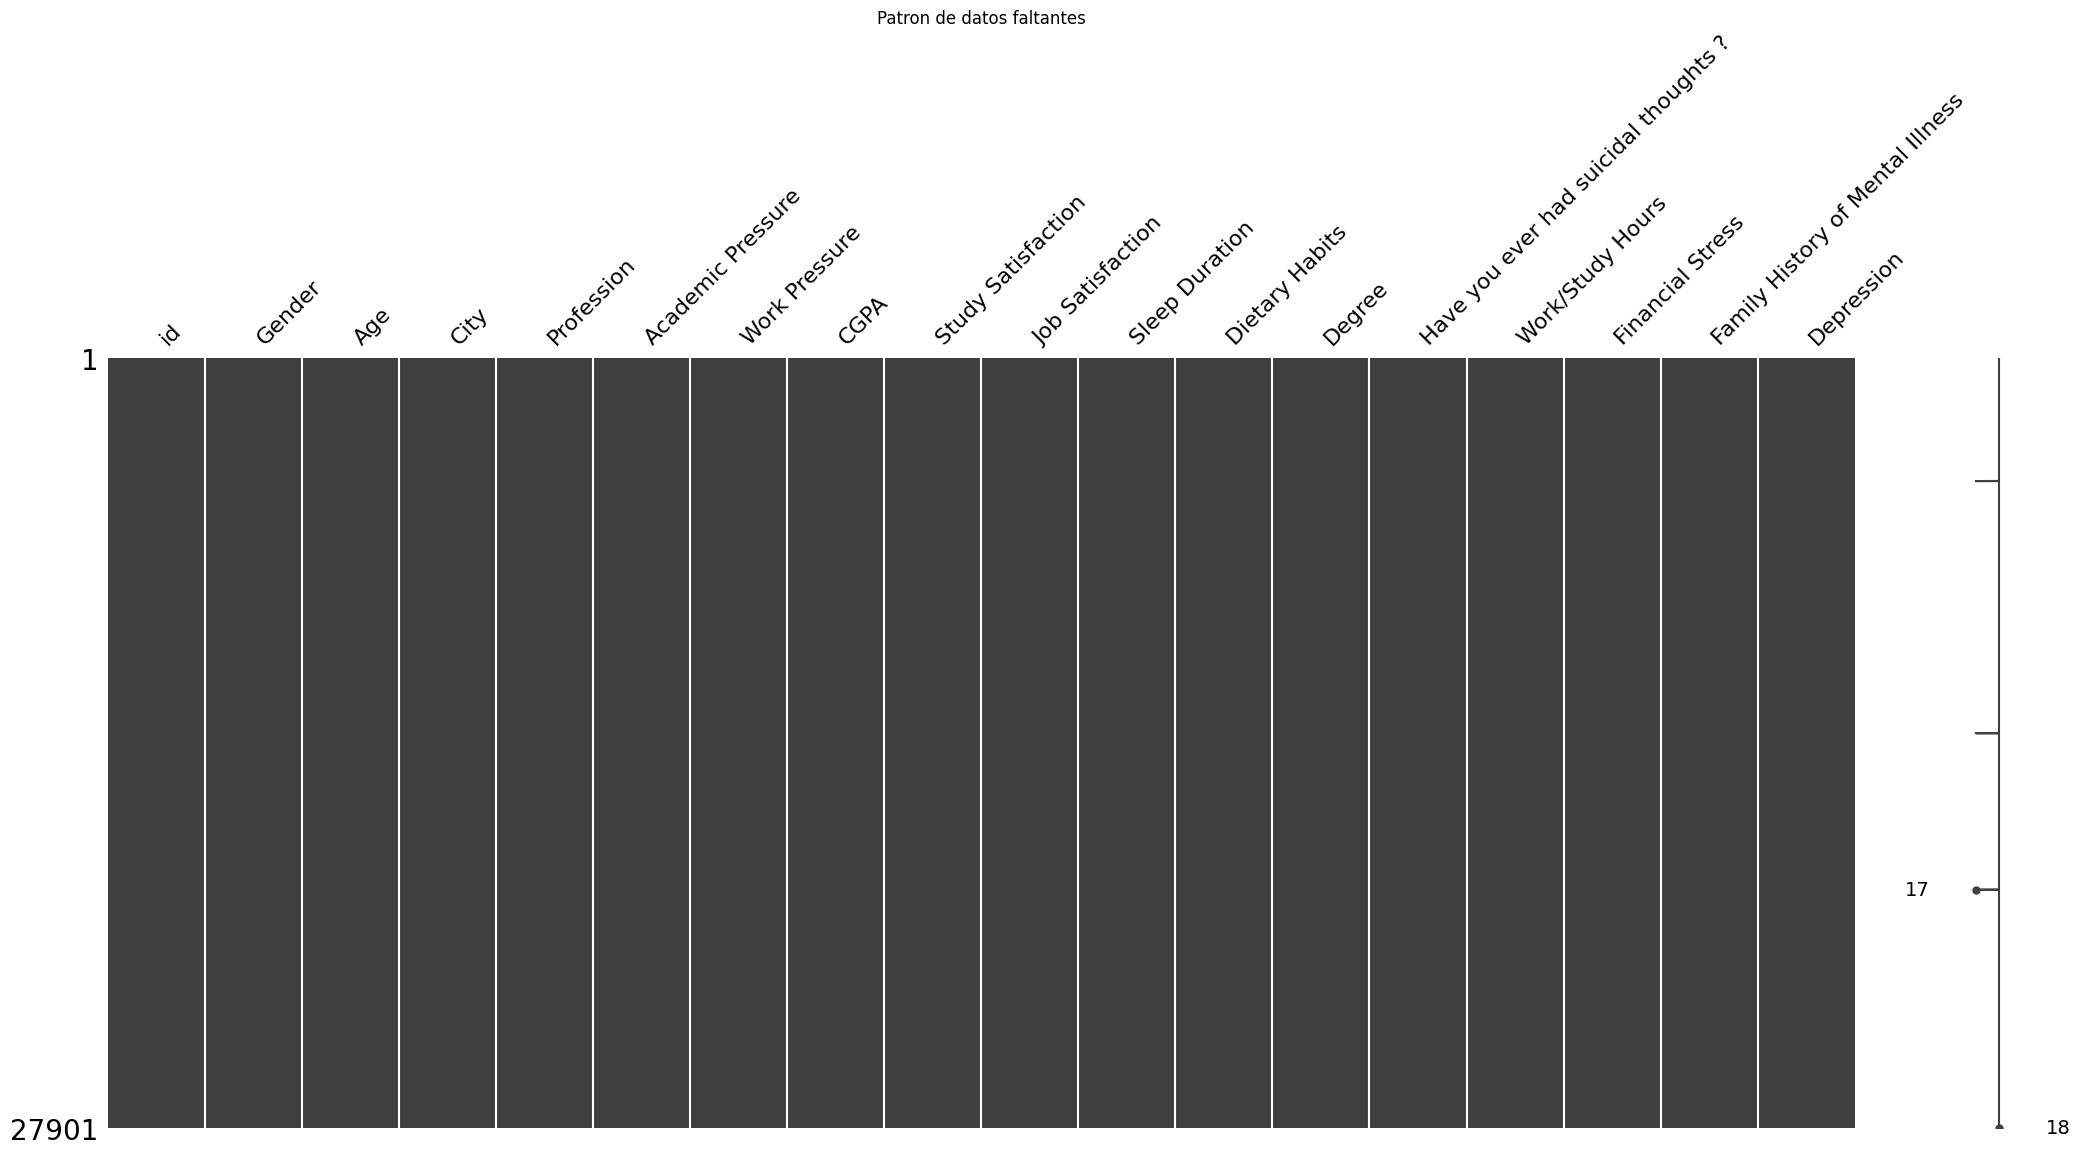

In [9]:
plt.figure(figsize=(10,6))
msno.matrix(df)
plt.title('Patron de datos faltantes')
plt.show();

<Figure size 1000x600 with 0 Axes>

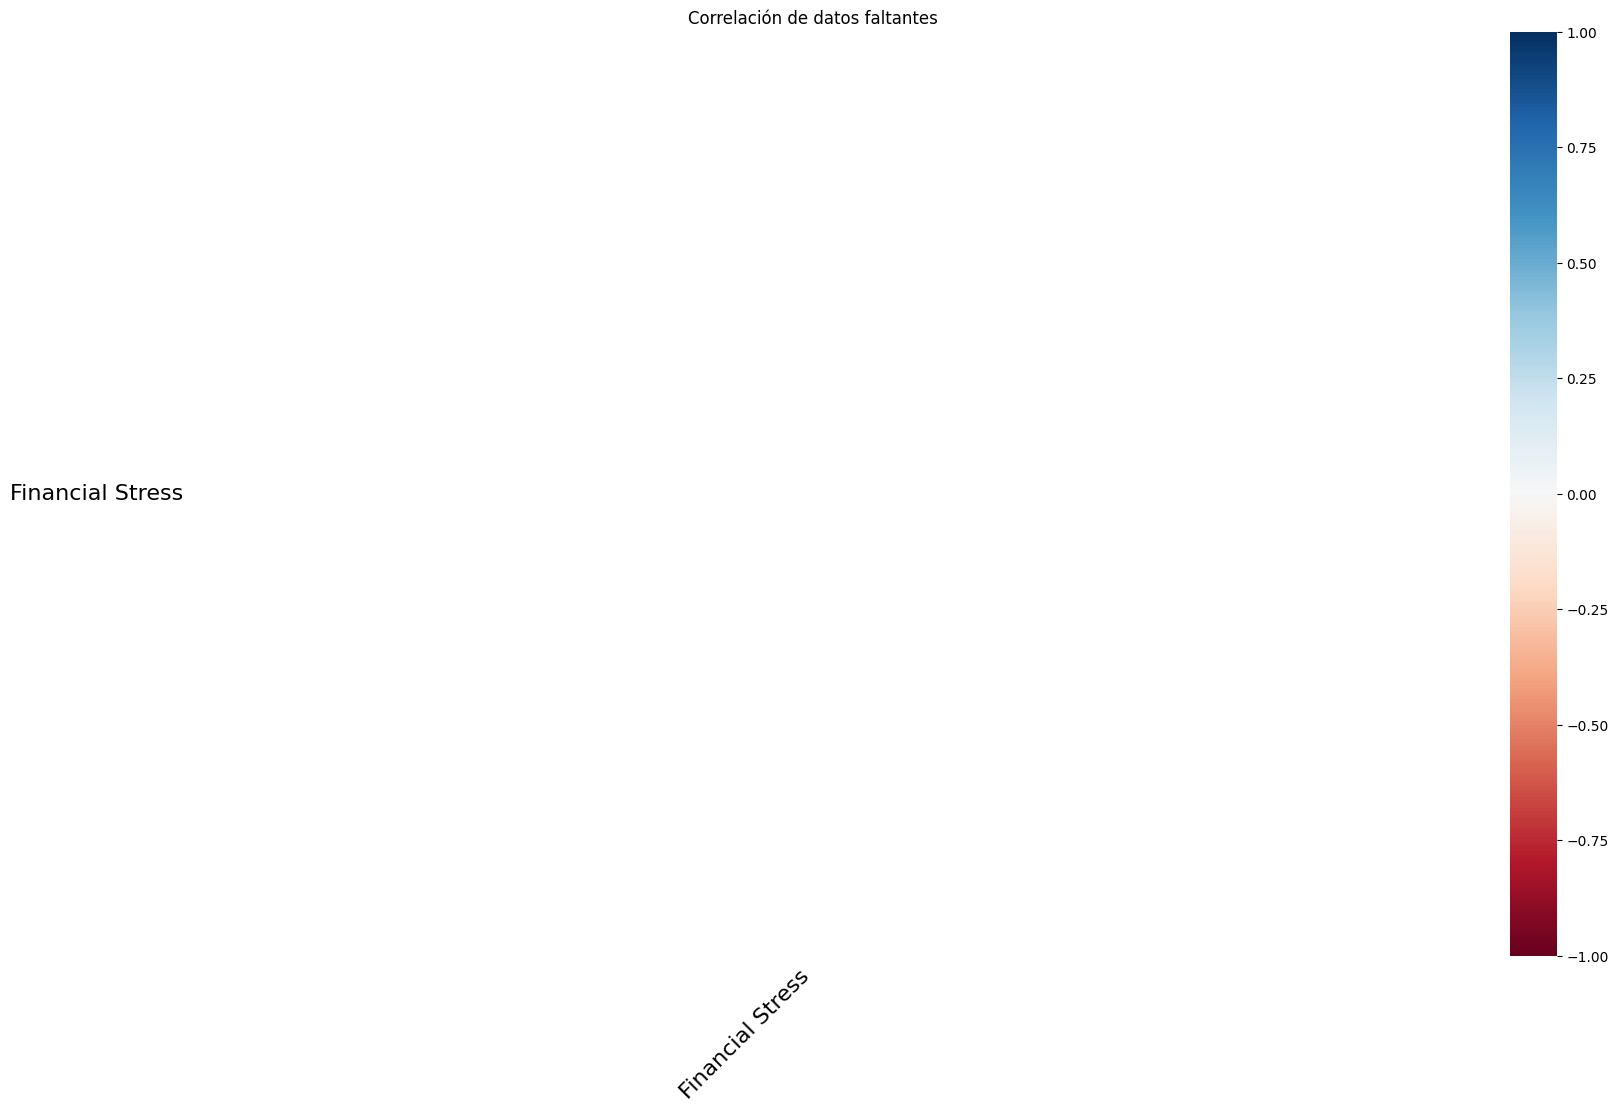

In [10]:
plt.figure(figsize=(10,6))
msno.heatmap(df)
plt.title('Correlación de datos faltantes')
plt.show();

Hay datos faltantes en la columna 'Financial stress' pero son muy pocos e insignificantes

In [11]:
# Análisis de datos faltantes
print('Análisis de body_mass_g')
#print('\nMedia con datos')
print('Media de datos con missing', df['Financial Stress'].mean())
print('Media con datos faltantes:',
      df['Financial Stress'].dropna().mean())
#np.nanmean(df['body_mass_g']) # Se puede hacer así también

Análisis de body_mass_g
Media de datos con missing 3.1398666571080365
Media con datos faltantes: 3.1398666571080365


2. Estrategias de Imputación:
   * Simples:
     - Media/Mediana/Moda
     - Valores constantes
     - Interpolación lineal

   * Avanzadas:
     - KNN
     - Random Forest
     - Multiple Imputation by Chained Equations (MICE)
     - Expectation-Maximization (EM)

3. Validación de Imputación:
   * Cross-validation de métodos de imputación
   * Análisis de sensibilidad
   * Comparación de distribuciones pre/post imputación

No hay datos que imputar

# 3.2 Tratamiento de Outliers
1. Métodos de Detección:
   * Estadísticos:
     - Z-score
     - IQR (Rango Intercuartílico)
     - Test de Grubbs
     - Test de Dixon

2. Estrategias de Tratamiento:
   * Winsorización
   * Transformaciones (log, raíz cuadrada)
   * Eliminación justificada
   * Creación de categorías específicas

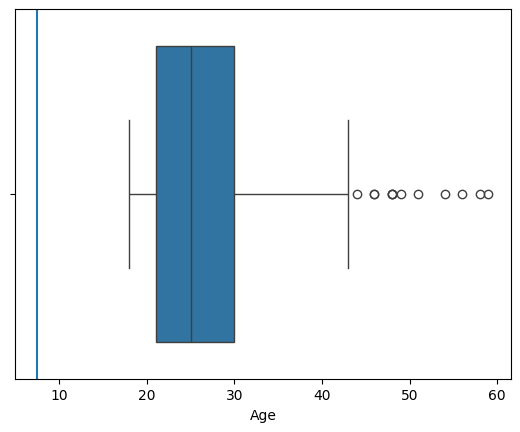

In [12]:
sns.boxplot(data = df, x='Age')
plt.axvline(x=7.5);

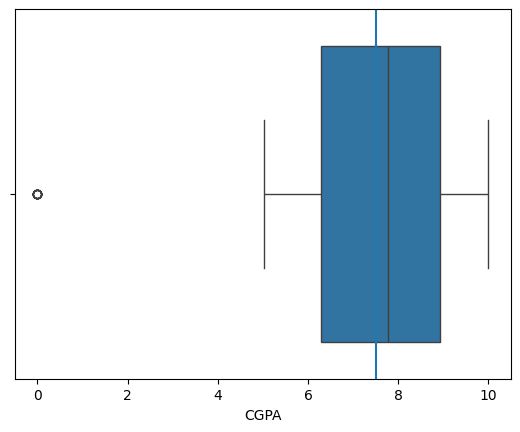

In [14]:
sns.boxplot(data = df, x='CGPA')
plt.axvline(x=7.5);

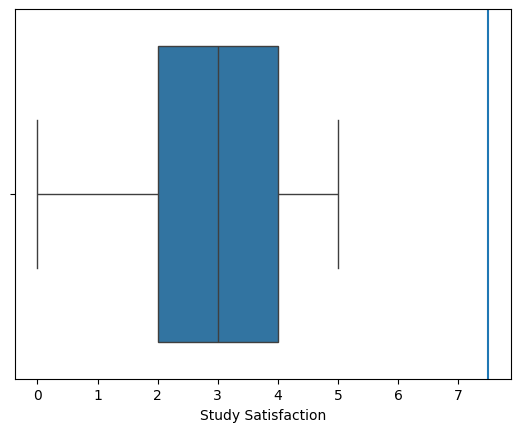

In [15]:
sns.boxplot(data = df, x='Study Satisfaction')
plt.axvline(x=7.5);

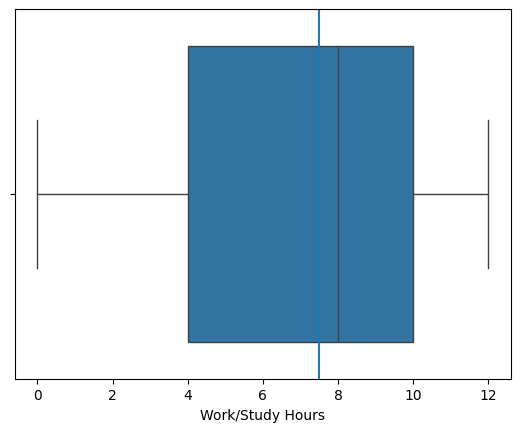

In [16]:
sns.boxplot(data = df, x='Work/Study Hours')
plt.axvline(x=7.5);

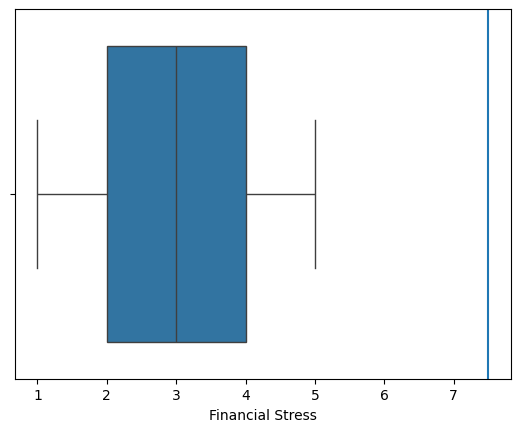

In [17]:
sns.boxplot(data = df, x='Financial Stress')
plt.axvline(x=7.5);

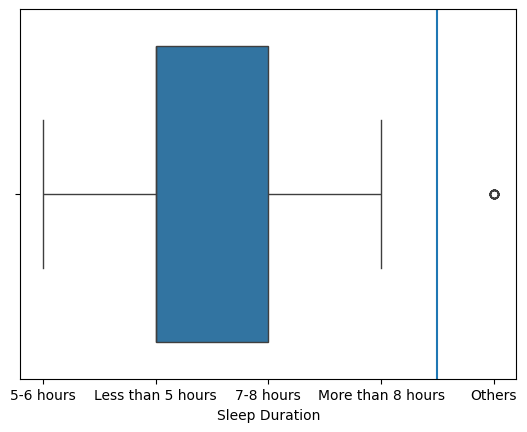

In [21]:
sns.boxplot(data = df, x='Sleep Duration')
plt.axvline(x=3.5);

Solo hay outliers en la columna 'Sleep duration', en la 'CGPA' y en 'Age' en esta última hay más y son más significantes.

Se pueden tratar los datos de otras maneras:
- Feature engineer
- Tratamiento de outliers...